In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#The import of Scipy to perform the t-test will be done later in the code

<pre>The main Idead that the data is trying to prove is 
to verify wheteher there is a gap between the gender equality in salries 
for the same positions.</pre>

### Methods
> - **Data Cleaning**
> - **Data Visualization**
> - **Data Analysis** 
>      -    **Hypothesis Testing**
>      -    **Statistical Analysis**




In [3]:
df = pd.read_csv("Glassdoor Gender Pay Gap.csv")
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
### The Data has no nulls and apparently no missing values.

<Axes: >

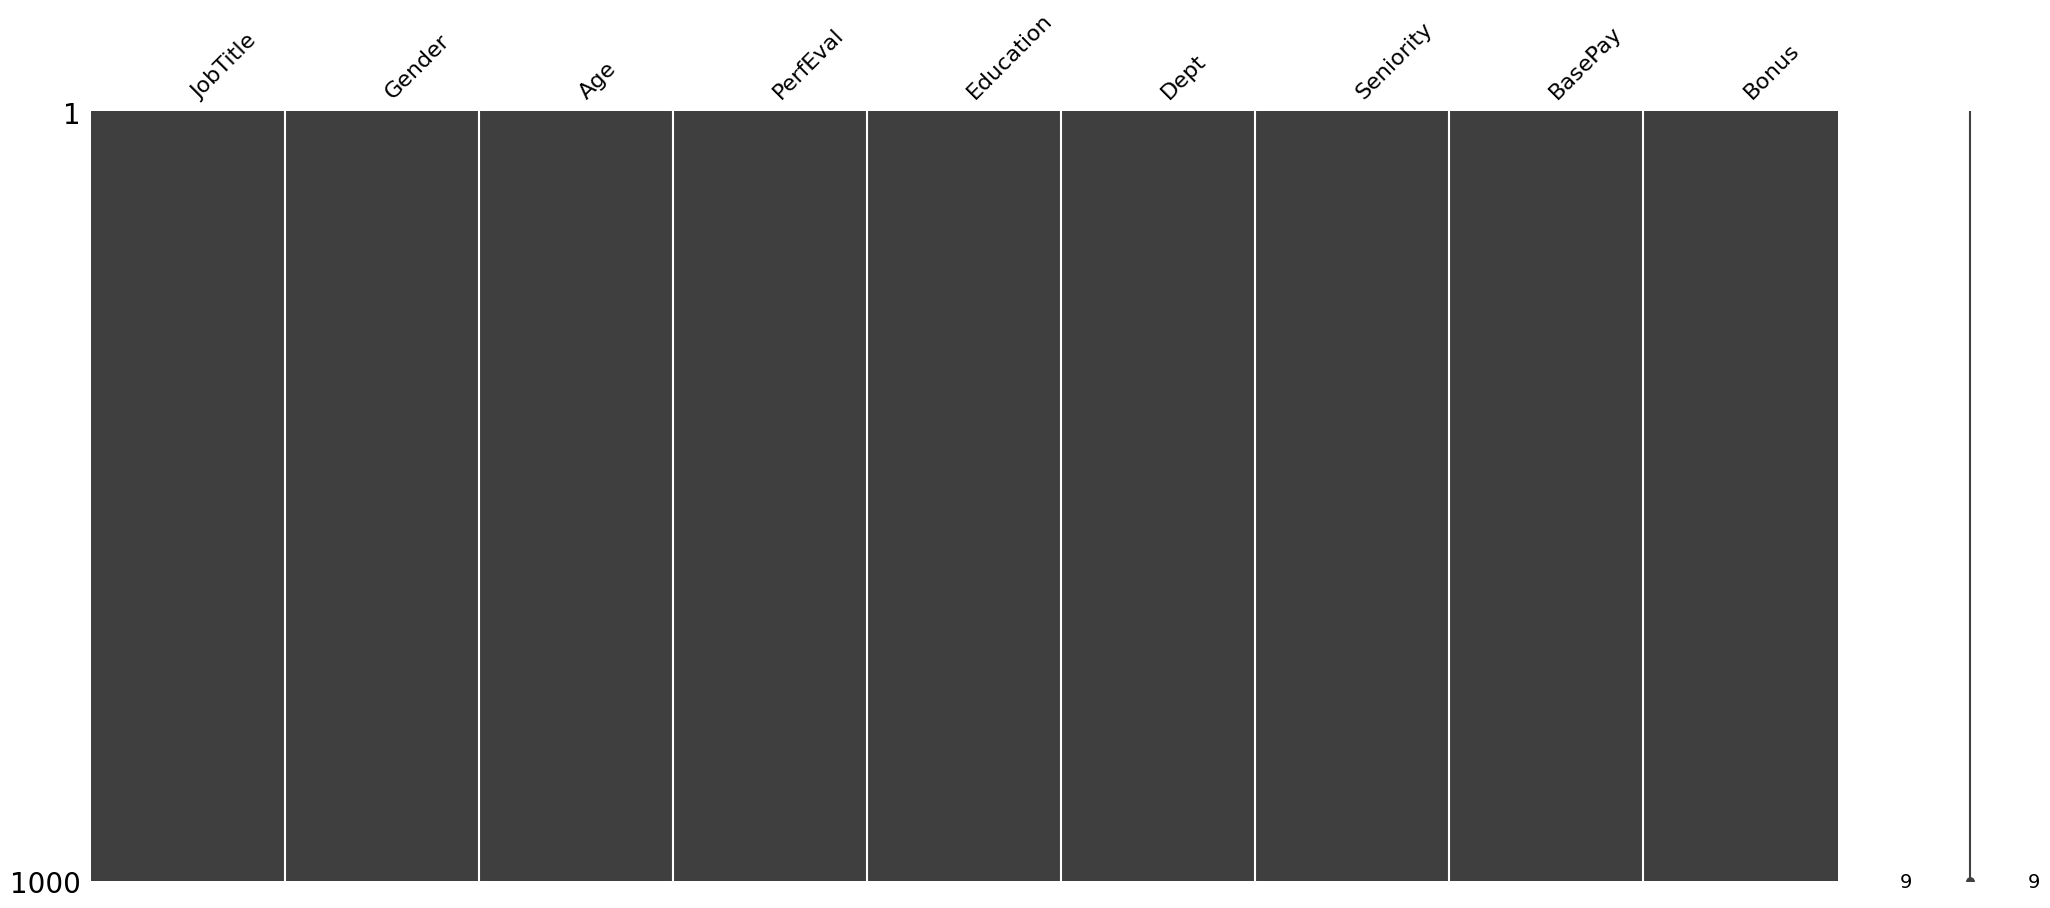

In [6]:
import missingno as msno
msno.matrix(df)

No Missing values in the dataset

In [7]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


The numbers looks good and there is no need to clean the data or remove any rows or columns
But let's check the outliers in the data

In [31]:
numeric=list(df.select_dtypes(include=np.number).columns.values)
category=list(df.select_dtypes(include='object').columns.values)


['Age', 'BasePay', 'Bonus']
['JobTitle', 'Gender', 'Education', 'Dept', 'Seniority', 'PerfEval']


The columns of seniority and perEval are ordina( categorical) and the other columns are numerical
So we might exclude them from the outliers check

In [ ]:
numeric.remove('Seniority')
numeric.remove('PerfEval')
category.append('Seniority')
category.append('PerfEval')
print(numeric)
print(category)

## Categorical Data

In [36]:
for i in category:
    print(df[i].value_counts())
    print('-------------------')

JobTitle
Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: count, dtype: int64
-------------------
Gender
Male      532
Female    468
Name: count, dtype: int64
-------------------
Education
High School    265
Masters        256
College        241
PhD            238
Name: count, dtype: int64
-------------------
Dept
Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: count, dtype: int64
-------------------
Seniority
3    219
2    209
1    195
5    193
4    184
Name: count, dtype: int64
-------------------
PerfEval
5    209
4    207
1    198
3    194
2    192
Name: count, dtype: int64
-------------------


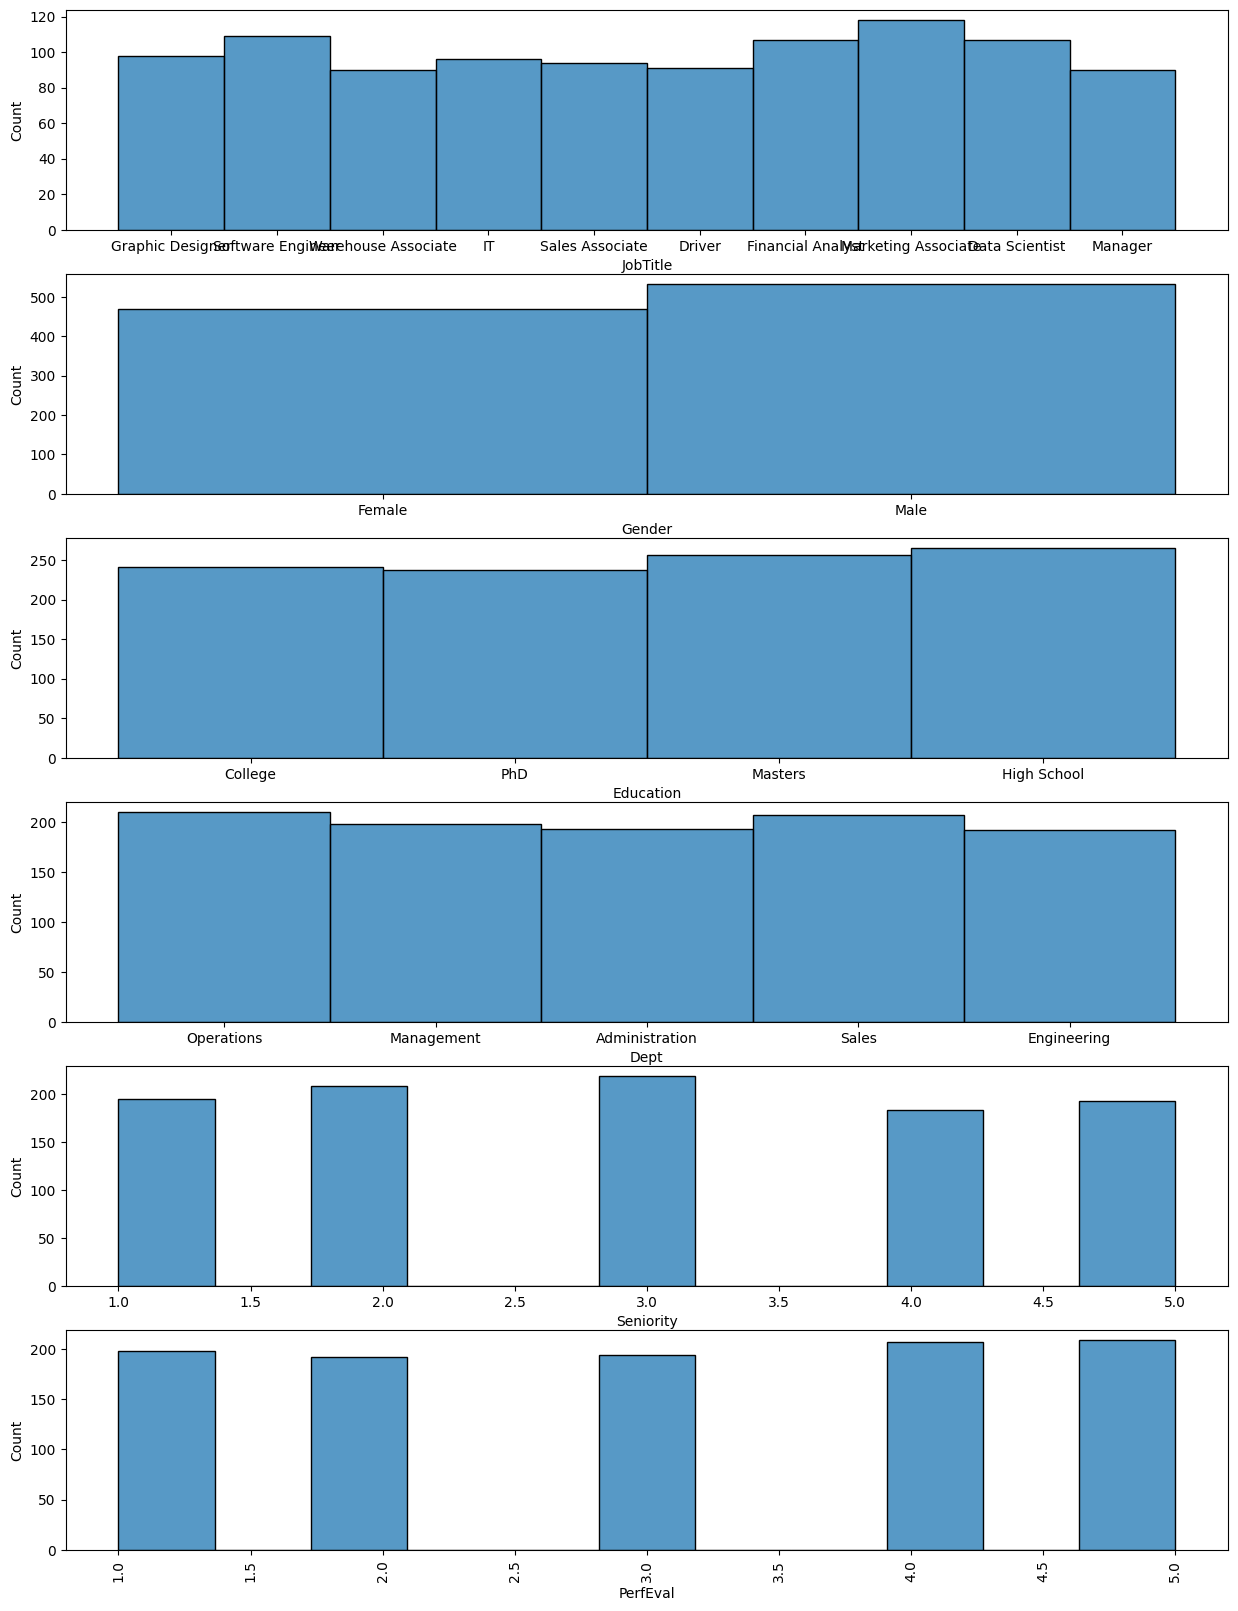

In [45]:
_,ax=plt.subplots(len(category),1,figsize=(15,20))
for cnt,i in enumerate(category):
    sns.histplot(df[i],ax=ax[cnt])
    plt.xticks(rotation=90)

## Numerical Data

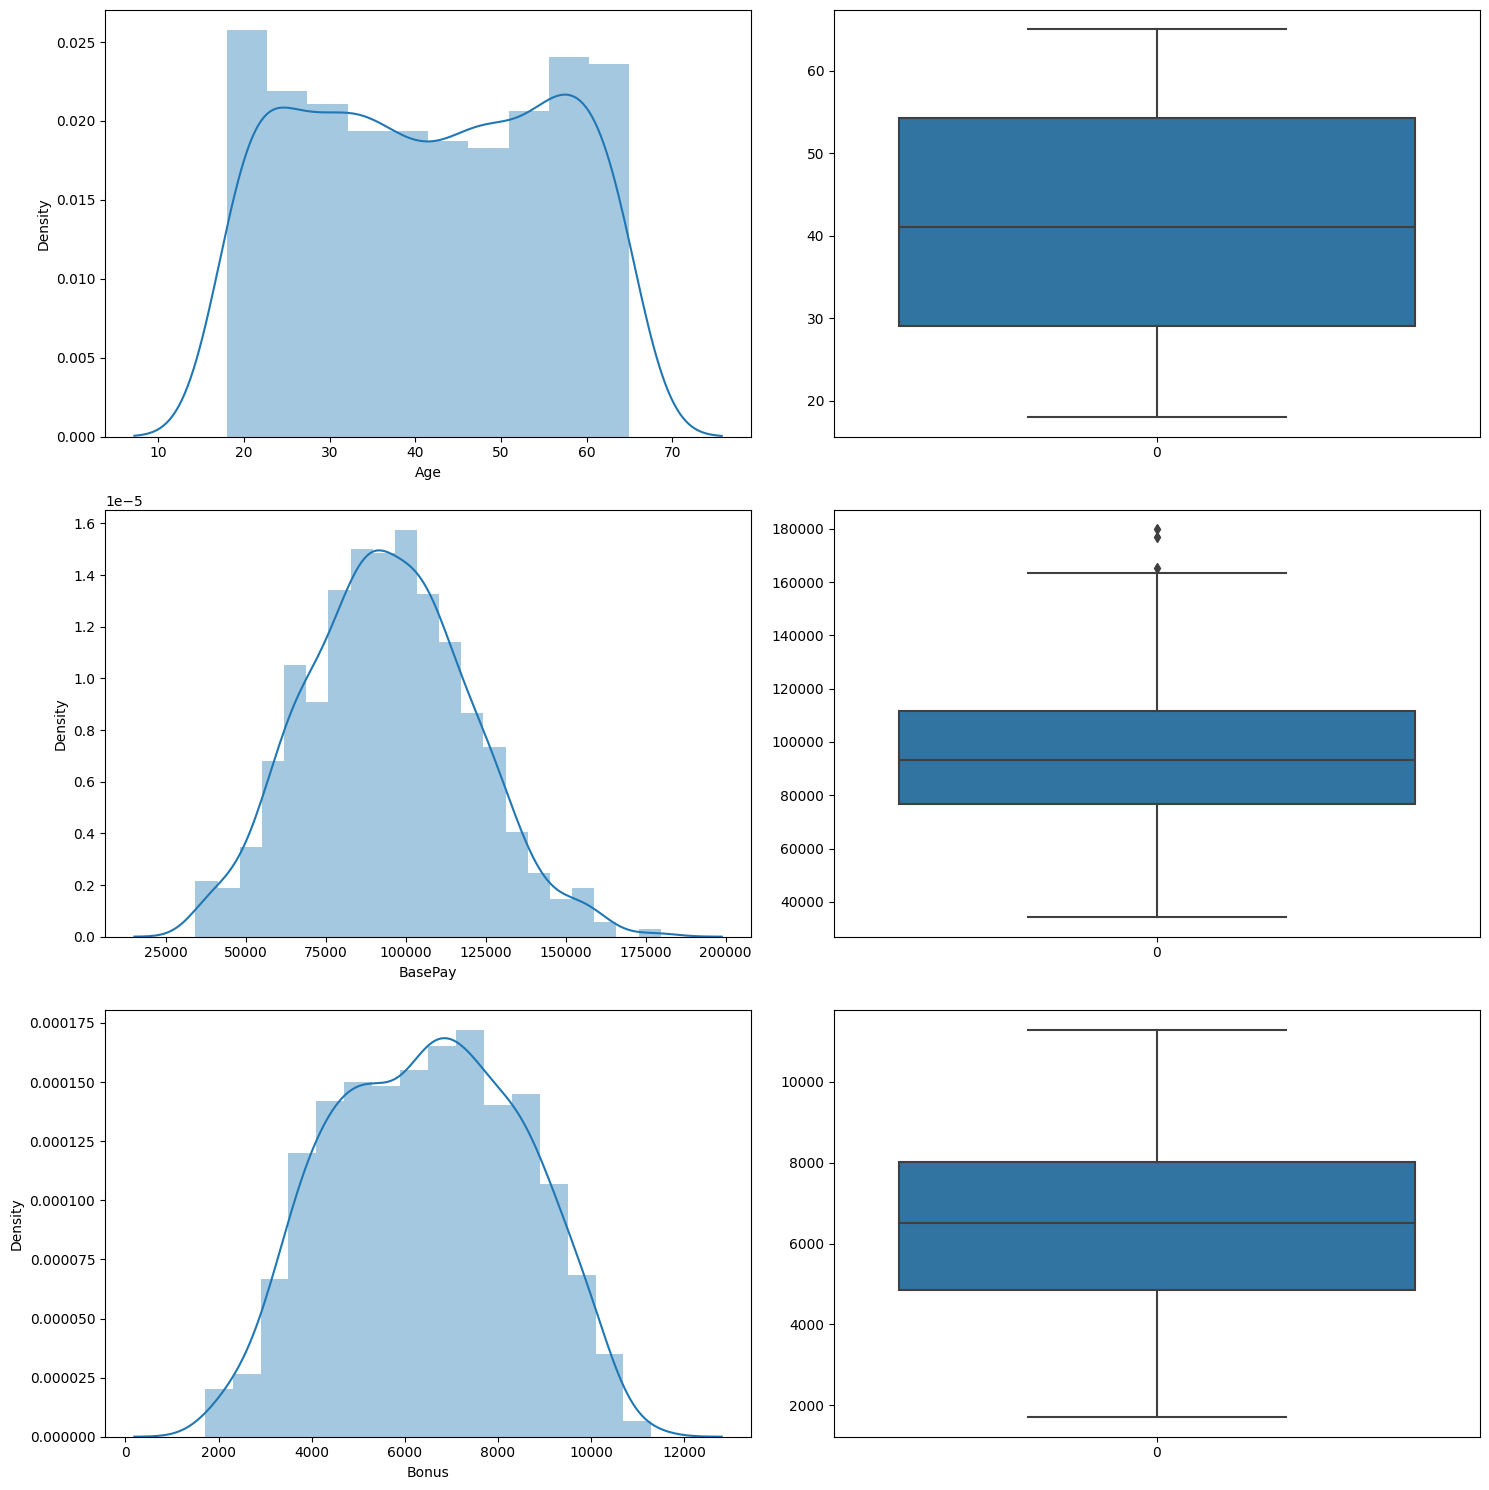

In [46]:
_,ax=plt.subplots(len(numeric),2,figsize=(15,15))
for i in numeric:
    sns.distplot(df[i],ax=ax[numeric.index(i),0])
    sns.boxplot(df[i],ax=ax[numeric.index(i),1])
plt.tight_layout()
plt.show()
    

## Over all the data is cleaned and doesn't need any cleaning 

- Even the outlier in the Base Pay is not affecting cause if we expnaded the qurtieles alittle it will be covered